In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the training file
RawData= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [3]:
#Importing Total number of cases from the Total cases file
dn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [4]:
# Importing the Total Number of cases 
RawData['Total_Cases'] = dn_cases['total_cases']
RawData.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [5]:
#dn_iq represents Iquitos
dn_iq = RawData[RawData['city']=='iq']
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [6]:
#Filling the NULL values for the city Iquitos with the mean of each column
dn_iq = dn_iq.fillna(value=dn_iq.mean())
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [7]:
#Since we are predicting the Total Cases we are droping the Totaol_cases column as this will be "Y" value
x1 = dn_iq.drop(['Total_Cases'], axis = 1).values
x1

array([['iq', 2000, 26, ..., 32.5, 20.7, 3.0],
       ['iq', 2000, 27, ..., 34.0, 20.8, 55.6],
       ['iq', 2000, 28, ..., 33.0, 20.7, 38.1],
       ...,
       ['iq', 2010, 23, ..., 32.2, 19.2, 7.4],
       ['iq', 2010, 24, ..., 31.2, 21.0, 16.0],
       ['iq', 2010, 25, ..., 33.7, 22.2, 20.4]], dtype=object)

In [8]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
x = np.delete(x1,[0,3],1)
x = np.delete(x,0,1)
x

array([[26, 0.19288570000000002, 0.13225710000000002, ..., 32.5, 20.7,
        3.0],
       [27, 0.2168333, 0.2761, ..., 34.0, 20.8, 55.6],
       [28, 0.1767571, 0.1731286, ..., 33.0, 20.7, 38.1],
       ...,
       [23, 0.2470571, 0.14605710000000002, ..., 32.2, 19.2, 7.4],
       [24, 0.3339143, 0.2457714, ..., 31.2, 21.0, 16.0],
       [25, 0.2981857, 0.2329714, ..., 33.7, 22.2, 20.4]], dtype=object)

In [9]:
x = dn_iq[[ 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 
       'station_avg_temp_c',  'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',]]

In [10]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = dn_iq['Total_Cases'].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2, random_state = 100)

In [12]:
from sklearn.ensemble import RandomForestRegressor 

In [13]:
regressor = RandomForestRegressor(n_estimators=50)

In [14]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
pr = regressor.predict(x_test)

In [16]:
pr

array([11.5       ,  9.2       , 21.48      ,  9.3       ,  5.48      ,
       16.6       ,  7.52      , 12.46      ,  5.8       ,  7.44      ,
       13.26      , 11.78      ,  3.94      ,  2.56      , 13.86      ,
        3.65      ,  4.8       , 14.44      ,  9.64      , 11.22      ,
        9.78      , 10.24      , 10.41      ,  3.96      ,  6.46      ,
        9.72      ,  9.18      ,  4.96      ,  4.32      ,  2.06      ,
       11.88      ,  8.5       ,  9.84      , 15.38      ,  6.82      ,
        1.74      ,  4.02      ,  2.688     ,  5.1       ,  9.2       ,
        4.02      ,  9.86      ,  5.52      ,  1.88      , 14.08      ,
       11.2       ,  3.34      ,  9.34      ,  3.64      , 10.76      ,
        2.37428571, 10.92      ,  3.76      ,  4.48      , 10.36      ,
       10.74      , 12.275     , 11.2       ,  8.24      ,  7.02      ,
        4.2       ,  3.44      ,  4.14      ,  3.62      ,  6.12      ,
        4.56      , 16.9       ,  4.        ,  4.54      ,  4.32

In [17]:
(y_test)

array([  8,  13,   4,   3,   5,   1,  10,   8,   4,   5,   0,   2,   3,
         0,   0,   3,   4,   2,  10,   8,   6,  25,  16,   0,   3,   6,
        11,   5,   1,   1,  21,   5,   7,   0,   7,   4,   2,   5,   5,
         8,   0,  19,   1,   5,  16,  13,   2,   0,   0,  11,   0,   4,
        16,   2,  20,   5,   1,  12, 116,   5,   0,   0,   6,   3,   8,
         5,  28,   1,   8,   5,  11,   3,  11,   7,  13,   4,   0,   3,
        11,  37,  10,   0,   1,   7,   0,   4,   1,   5,   3,   7,   0,
        16,   3,   0,   0,   8,   4,   5,   2,   2,  20,   0,   0,  19],
      dtype=int64)

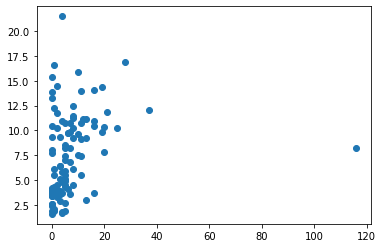

In [18]:
plt.scatter(y_test,pr)

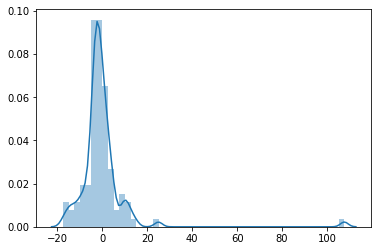

In [19]:
sns.distplot(y_test-pr)

In [20]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, pr)

5.597822802197802

In [23]:
metrics.mean_squared_error(y_test, pr)

152.9202958628336

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, pr))

12.3660946083569